<a href="https://colab.research.google.com/github/noviambar/AdminLTE3/blob/master/Image_Classification_Batik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import zipfile, os
local_zip = '/content/drive/My Drive/Data Batik.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [129]:
print("Train Data each class")
print('Batik Kawung    :', len(os.listdir('/content/Dataset/Batik Kawung/')))
print('Batik Lasem  :', len(os.listdir('/content/Dataset/Batik Lasem')))
print('Batik Megamendung :', len(os.listdir('/content/Dataset/Batik Megamendung')))
print('Batik Parang   :', len(os.listdir('/content/Dataset/Batik Parang')))



Train Data each class
Batik Kawung    : 691
Batik Lasem  : 171
Batik Megamendung : 160
Batik Parang   : 1720


In [130]:
os.mkdir('/content/Dataset/tmp/s/')
os.mkdir('/content/Dataset/tmp/s/train/')
os.mkdir('/content/Dataset/tmp/s/val/')
os.mkdir('/content/Dataset/tmp/s/train/Batik Kawung/')
os.mkdir('/content/Dataset/tmp/s/val/Batik Kawung/')
os.mkdir('/content/Dataset/tmp/s/train/Batik Lasem/')
os.mkdir('/content/Dataset/tmp/s/val/Batik Lasem/')
os.mkdir('/content/Dataset/tmp/s/train/Batik Megamendung/')
os.mkdir('/content/Dataset/tmp/s/val/Batik Megamendung/')
os.mkdir('/content/Dataset/tmp/s/train/Batik Parang/')
os.mkdir('/content/Dataset/tmp/s/val/Batik Parang/')


FileExistsError: ignored

In [142]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.8

In [143]:
#Pembagian Training dan Validasi

source_00 = '/content/Dataset/Batik Kawung/'
train_00 = '/content/Dataset/tmp/s/train/Batik Kawung/'
val_00 = '/content/Dataset/tmp/s/val/Batik Kawung/'
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = '/content/Dataset/Batik Lasem/'
train_01 = '/content/Dataset/tmp/s/train/Batik Lasem/'
val_01 = '/content/Dataset/tmp/s/val/Batik Lasem/'
train_val_split(source_01, train_01, val_01, train_ratio)

source_06 = '/content/Dataset/Batik Megamendung/'
train_06 = '/content/Dataset/tmp/s/train/Batik Megamendung/'
val_06 = '/content/Dataset/tmp/s/val/Batik Megamendung/'
train_val_split(source_06, train_06, val_06, train_ratio)

source_07 = '/content/Dataset/Batik Parang/'
train_07 = '/content/Dataset/tmp/s/train/Batik Parang/'
val_07 = '/content/Dataset/tmp/s/val/Batik Parang/'
train_val_split(source_07, train_07, val_07, train_ratio)

In [144]:
print('Data Batik Kawung: ',len(os.listdir('/content/Dataset/Batik Kawung')))
print('Data Train Batik Kawung: ',len(os.listdir('/content/Dataset/tmp/s/train/Batik Kawung')))
print('Data Validation Batik Kawung: ',len(os.listdir('/content/Dataset/tmp/s/val/Batik Kawung')))

Data Batik Kawung:  691
Data Train Batik Kawung:  691
Data Validation Batik Kawung:  627


In [63]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale = 1./255.,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255.,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [65]:
train_dir = '/content/Dataset/tmp/s/train/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (250, 250),
    batch_size = 32,
    class_mode = 'categorical'
)

val_dir = '/content/Dataset/tmp/s/val/'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (250, 250),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2733 images belonging to 4 classes.
Found 1452 images belonging to 4 classes.


In [66]:
# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [80]:
import tensorflow as tf

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (250, 250, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3,seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5,seed=112),
          tf.keras.layers.Dense(4, activation = 'softmax')
])

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 53824)            

In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [83]:
import sys
from PIL import Image
sys.modules['Image'] = Image

from PIL import Image
print(Image.__file__)

import Image
print(Image.__file__)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py
/usr/local/lib/python3.7/dist-packages/PIL/Image.py


In [95]:
history = model.fit(
            train_generator,
            steps_per_epoch = 20,
            epochs = 10,
            validation_data = val_generator,
            validation_steps = 5,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/10
20/20 [==============================] - 80s 4s/step - loss: 0.4049 - accuracy: 0.8500 - val_loss: 0.3003 - val_accuracy: 0.9000
Epoch 2/10
20/20 [==============================] - 81s 4s/step - loss: 0.3676 - accuracy: 0.8797 - val_loss: 0.2684 - val_accuracy: 0.9250
Epoch 3/10
20/20 [==============================] - 79s 4s/step - loss: 0.2936 - accuracy: 0.9078 - val_loss: 0.3368 - val_accuracy: 0.8875
Epoch 4/10
20/20 [==============================] - 80s 4s/step - loss: 0.2970 - accuracy: 0.9000 - val_loss: 0.3264 - val_accuracy: 0.8750
Epoch 5/10
20/20 [==============================] - 79s 4s/step - loss: 0.2602 - accuracy: 0.9187 - val_loss: 0.3057 - val_accuracy: 0.8562
Epoch 6/10
20/20 [==============================] - 79s 4s/step - loss: 0.3412 - accuracy: 0.8844 - val_loss: 0.3890 - val_accuracy: 0.8875
Epoch 7/10
20/20 [==============================] - 79s 4s/step - loss: 0.3110 - accuracy: 0.9109 - val_loss: 0.3347 - val_accuracy: 0.8813
Epoch 8/10
20/20 [==

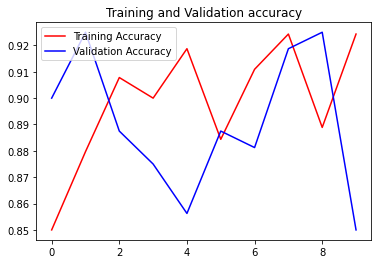

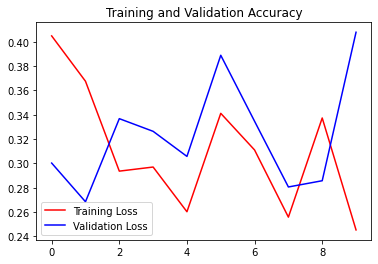

In [96]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

Saving Batik Kawung (1).jpg to Batik Kawung (1) (2).jpg
Batik Kawung (1).jpg
This image belongs to class Batik Lasem


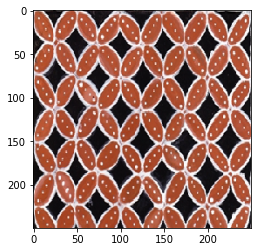

In [116]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (250, 250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 200)

  print(fn)

  class_list = os.listdir('/content/Dataset/')
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j])
      break
